In [1]:
!pip install opencv-contrib-python==4.8.0.76

In [2]:
import cv2
cv2.__version__

'4.8.0'

In [3]:
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define parameters for the CharucoBoard
num_squares_x = 7
num_squares_y = 10
square_length = 0.04  # length of each square side in meters
marker_length = 0.02  # length of the markers in meters
dictionary = aruco.getPredefinedDictionary(aruco.DICT_5X5_1000)  # you can choose a different dictionary

# Define a nonzero start ID for aruco markers
start_id = 200

# Create CharucoBoard with a nonzero start ID
board1 = aruco.CharucoBoard(
    (num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=dictionary,
    ids=np.arange(start_id, start_id+num_squares_x*num_squares_y//2, dtype=np.int32)
)

board2 = aruco.CharucoBoard(
    (num_squares_x, num_squares_y),
    squareLength=square_length,
    markerLength=marker_length,
    dictionary=dictionary,
    ids=board1.getIds() + len(board1.getIds()),
)

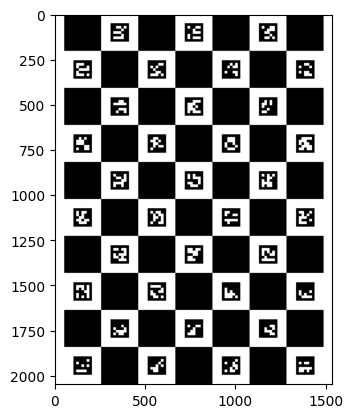

In [5]:
img1 = board1.generateImage((1536, 2048), marginSize=0)
plt.imshow(img1, cmap='gray')

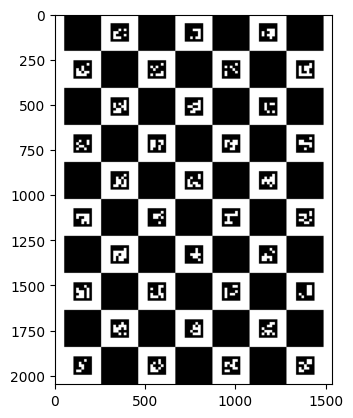

In [6]:
img2 = board2.generateImage((1536, 2048), marginSize=0)
plt.imshow(img2, cmap='gray')

In [7]:
exp_type = "90degree"

In [8]:
hdrfiledir = "/home/yuruihan/DS-FaceScape/hdr_emitter/align_merge_out_2023_12_07_{}_ldr".format(exp_type)

In [73]:
import os
# Vector to store 3D points 
obj_points = [] 
# Vector to store 2D points 
img_points = [] 
aruco_dict = dictionary
board1_file_list = []
for file in os.listdir(hdrfiledir):
    if file.endswith(".png"):
        img = cv2.imread(os.path.join(hdrfiledir, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers(img, aruco_dict)
        if len(markerCorners1) == 0:
            continue
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners1, markerIds1, gray, board1)
        if charuco_corners is not None and charuco_ids is not None:
            obj_point,img_point= board1.matchImagePoints(
                charuco_corners, charuco_ids,
            )
            if len(obj_point) >= 15:

                obj_points.append(obj_point)
                img_points.append(img_point)
                print("add {}".format(file))
                board1_file_list.append(file)

add IMG_0239.png
add IMG_0302.png
add IMG_0309.png


In [61]:
for file in os.listdir(hdrfiledir):
    if file.endswith(".png"):
        img = cv2.imread(os.path.join(hdrfiledir, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers(img, aruco_dict)
        if len(markerCorners1) == 0:
            continue
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners1, markerIds1, gray, board1)
        if charuco_corners is not None and charuco_ids is not None:
            obj_point,img_point= board1.matchImagePoints(
                charuco_corners, charuco_ids,
            )
            if len(obj_point) >= 6:
            # 以img_point 为中心，在图上画圆，半径为10pixel,颜色为红色，线宽为2pixel
                for i in range(len(img_point)):
                    int_img_point = (int(img_point[i][0][0]), int(img_point[i][0][1]))
                    cv2.circle(img, int_img_point, 10, (0, 0, 255), 2)
                cv2.imwrite("./img_point1/{}.png".format(file[:-4]), img)
                # print
                print("save {}".format(file))

save IMG_0218.png
save IMG_0225.png
save IMG_0239.png
save IMG_0274.png
save IMG_0281.png
save IMG_0302.png
save IMG_0309.png
save IMG_0337.png


In [72]:
for file in os.listdir(hdrfiledir):
    if file.endswith(".png"):
        img = cv2.imread(os.path.join(hdrfiledir, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        markerCorners2, markerIds2, rejectedImgPoints2 = cv2.aruco.detectMarkers(img, aruco_dict)
        if len(markerCorners2) == 0:
            continue
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners2, markerIds2, gray, board2)
        if charuco_corners is not None and charuco_ids is not None:
            obj_point,img_point= board2.matchImagePoints(
                charuco_corners, charuco_ids,
            )
            if len(obj_point) >= 6:
                # 以img_point 为中心，在图上画圆，半径为10pixel,颜色为红色，线宽为2pixel
                for i in range(len(img_point)):
                    int_img_point = (int(img_point[i][0][0]), int(img_point[i][0][1]))
                    cv2.circle(img, int_img_point, 10, (0, 0, 255), 2)
                cv2.imwrite("./img_point2/{}.png".format(file[:-4]), img)

In [63]:
import os
# Vector to store 3D points 
obj_points2 = [] 
# Vector to store 2D points 
img_points2 = [] 
valid_count = 0
aruco_dict = dictionary
board2_file_list = []
for file in os.listdir(hdrfiledir):
    if file.endswith(".png"):
        img = cv2.imread(os.path.join(hdrfiledir, file))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        markerCorners2, markerIds2, rejectedImgPoints2 = cv2.aruco.detectMarkers(img, aruco_dict)
        if len(markerCorners2) == 0:
            continue
        retval, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(markerCorners2, markerIds2, gray, board2)
        if charuco_corners is not None and charuco_ids is not None:
            obj_point,img_point= board2.matchImagePoints(
                charuco_corners, charuco_ids,
            )
            valid_count += 1
            if len(obj_point) >= 10:

                obj_points2.append(obj_point)
                img_points2.append(img_point)
                print("add {}".format(file))
                board2_file_list.append(file)
print(valid_count)
            


add IMG_0204.png
add IMG_0260.png
add IMG_0267.png
add IMG_0274.png
add IMG_0295.png
add IMG_0302.png
16


In [24]:
for file in board1_file_list:
    print("processing {}".format(file))
    file_path = os.path.join(hdrfiledir, file)
    img_draw_marker = cv2.imread(file_path)
    markerCorners1, markerIds1, rejectedImgPoints1 = cv2.aruco.detectMarkers( img_draw_marker, aruco_dict)
    markerCorners1 = np.array(markerCorners1)
    # marker IDs selected start_id, start_id+num_squares_x*num_squares_y//2
    board1_markerIds1_indice = np.where((markerIds1 >= start_id) & (markerIds1 < start_id+num_squares_x*num_squares_y//2))[0]
    markerIds1 = markerIds1[board1_markerIds1_indice]
    markerCorners1 = markerCorners1[board1_markerIds1_indice]
    markerCorners1 = tuple(markerCorners1)
    cv2.aruco.drawDetectedMarkers(img_draw_marker, markerCorners1, markerIds1)
    # save the image
    # file remove png
    cv2.imwrite("./board1/detected_markers_{}.png".format(file[:-4] ), img_draw_marker)
    print("save ./board1/detected_markers_{}.png".format(file[:-4] ))

processing IMG_0218.png
save ./board1/detected_markers_IMG_0218.png
processing IMG_0225.png
save ./board1/detected_markers_IMG_0225.png
processing IMG_0239.png
save ./board1/detected_markers_IMG_0239.png
processing IMG_0274.png
save ./board1/detected_markers_IMG_0274.png
processing IMG_0281.png
save ./board1/detected_markers_IMG_0281.png
processing IMG_0302.png
save ./board1/detected_markers_IMG_0302.png
processing IMG_0309.png
save ./board1/detected_markers_IMG_0309.png
processing IMG_0337.png
save ./board1/detected_markers_IMG_0337.png


In [26]:
for file in board2_file_list:
    file_path = os.path.join(hdrfiledir, file)
    img_draw_marker = cv2.imread(file_path)
    markerCorners2, markerIds2, rejectedImgPoints2 = cv2.aruco.detectMarkers( img_draw_marker, aruco_dict)

    markerCorners2 = np.array(markerCorners2)
    # marker IDs selected start_id, start_id+num_squares_x*num_squares_y//2
    board2_markerIds2_indice = np.where((markerIds2 >= start_id+num_squares_x*num_squares_y//2) & (markerIds2 < start_id+num_squares_x*num_squares_y//2+num_squares_x*num_squares_y//2))[0]
    markerIds2 = markerIds2[board2_markerIds2_indice]
    markerCorners2 = markerCorners2[board2_markerIds2_indice]
    markerCorners2 = tuple(markerCorners2)
    cv2.aruco.drawDetectedMarkers(img_draw_marker, markerCorners2, markerIds2)
    # save the image
    cv2.imwrite("./board2/detected_markers_{}.png".format(file), img_draw_marker)

In [166]:
# 读取json文件
import json
json_dir = "/home/yuruihan/DS-FaceScape/hdr_emitter/nerfstudio/nerfstudio/hdr_reality_room_12_07_{}".format(exp_type)

with open(json_dir + '/transforms.json', 'r') as f:
    camera_json = json.load(f)
    frame = camera_json['frames'][0]
    camera_matrix_meta = np.array([[frame["fl_x"],0,frame["cx"]],[0,frame["fl_y"],frame["cy"]],[0,0,1]])
    camera_matrix_meta2 = np.array([[frame["fl_x"],0,frame["cx"]],[0,frame["fl_y"],frame["cy"]],[0,0,1]])
    dist_coeffs_meta = np.array([frame["k1"],frame["k2"],frame["k3"],frame["p1"],frame["p2"]])

In [168]:
ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], camera_matrix_meta, dist_coeffs_meta)
ret2, camera_matrix2, dist_coeffs2, rvecs2, tvecs2 = cv2.calibrateCamera(obj_points2, img_points2, gray.shape[::-1], camera_matrix_meta2, dist_coeffs_meta)

In [122]:
world_coord = np.array([0,0,0])
rotation_matrix = cv2.Rodrigues(rvecs[0])[0]
translation_matrix = tvecs[0]
camera_matrix = np.array(camera_matrix)
# cal pixel coord
pixel_coord = np.dot(camera_matrix, np.dot(rotation_matrix, world_coord) + translation_matrix)

In [161]:
ret2, camera_matrix2, dist_coeffs2, rvecs2, tvecs2 = cv2.calibrateCamera(obj_points2, img_points2, gray.shape[::-1], camera_matrix_meta2, dist_coeffs_meta)

In [157]:
ret2, camera_matrix2, dist_coeffs2, rvecs2, tvecs2 = cv2.calibrateCamera(obj_points2, img_points2, gray.shape[::-1], None, None)

In [153]:
camera_matrix_meta

array([[1.07828839e+04, 0.00000000e+00, 2.88722016e+03],
       [0.00000000e+00, 1.07828839e+04, 2.09567664e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [162]:
camera_matrix_meta2

array([[1.10904669e+04, 0.00000000e+00, 2.89274583e+03],
       [0.00000000e+00, 6.46932143e+03, 1.87869484e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [158]:
camera_matrix2

array([[1.10904669e+04, 0.00000000e+00, 2.89274583e+03],
       [0.00000000e+00, 6.46932143e+03, 1.87869484e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

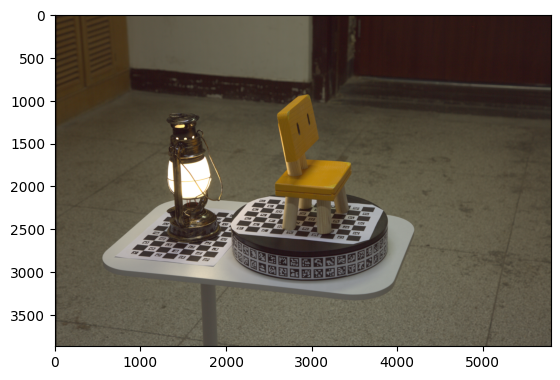

In [134]:
file= "IMG_0302.png"
# match indice in board1_file_list and board2_file_list
board1_indice = board1_file_list.index(file)
board2_indice = board2_file_list.index(file)
file_path = os.path.join(hdrfiledir, file)
img = cv2.imread(filename=file_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

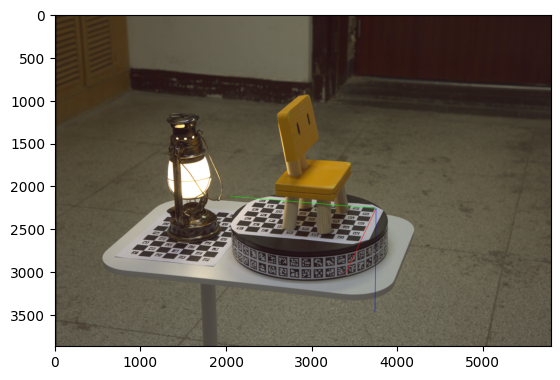

In [169]:
axis_img1 = cv2.drawFrameAxes(img.copy(), camera_matrix_meta, dist_coeffs, rvecs[board1_indice], tvecs[board1_indice], 0.5)
plt.imshow(cv2.cvtColor(axis_img1, cv2.COLOR_BGR2RGB))

In [165]:
pure_camera_matrix

array([[1.02516562e+04, 0.00000000e+00, 2.73267355e+03],
       [0.00000000e+00, 8.16612962e+03, 2.02456558e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [167]:
cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], camera_matrix_meta,dist_coeffs_meta )

(0.5435794072025103,
 array([[1.02516562e+04, 0.00000000e+00, 2.73267355e+03],
        [0.00000000e+00, 8.16612962e+03, 2.02456558e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([-1.28730856e-01,  3.67520910e+01, -1.91086208e-02, -1.50479394e-02,
        -5.34298606e-01]),
 (array([[-0.76344755],
         [ 1.36446643],
         [ 1.69733097]]),
  array([[-0.75270575],
         [ 1.02091398],
         [ 1.60516753]]),
  array([[-0.96331391],
         [ 0.65217688],
         [ 1.04516528]])),
 (array([[0.32168082],
         [0.18991159],
         [3.02432527]]),
  array([[0.2819335 ],
         [0.08285145],
         [2.87073886]]),
  array([[0.21546372],
         [0.01210652],
         [3.0194799 ]])))

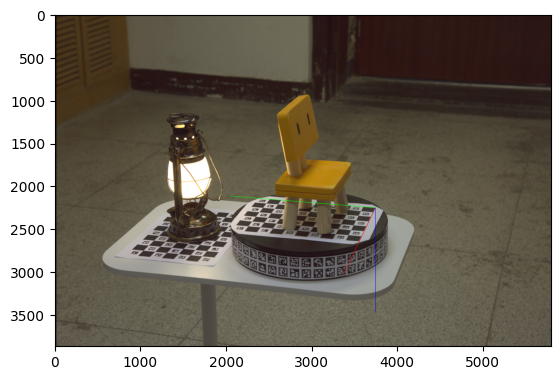

In [164]:
pure_ret, pure_camera_matrix, pure_dist_coeffs, pure_rvecs, pure_tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None,None)
axis_img3 = cv2.drawFrameAxes(img.copy(), pure_camera_matrix, pure_dist_coeffs, pure_rvecs[board1_indice],  pure_tvecs[board1_indice], 0.5)
plt.imshow(cv2.cvtColor(axis_img3, cv2.COLOR_BGR2RGB))

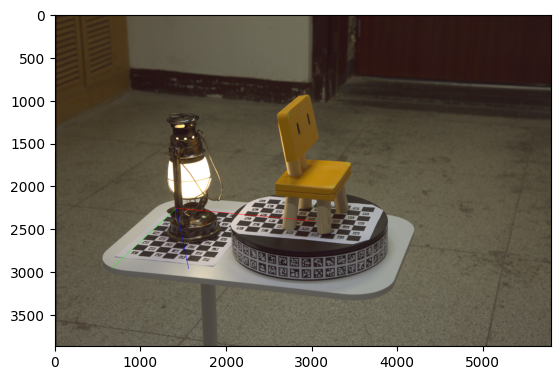

In [136]:
axis_img2 = cv2.drawFrameAxes(img.copy(), camera_matrix_meta, dist_coeffs2, rvecs2[board2_indice], tvecs2[board2_indice], 0.5)
plt.imshow(cv2.cvtColor(axis_img2, cv2.COLOR_BGR2RGB))